In [2]:
#uncomment the following lines to download the dependancies for plotting the locations. Restart your runtime after the download is complete

!pip install https://github.com/matplotlib/basemap/archive/master.zip

  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Using cached https://files.pythonhosted.org/packages/b1/72/d52e9ca81caef056062d71991b0e9b1d16af042245627c5d0e4916a36c4f/pyproj-3.0.1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/38/85/fbf87e7aa55103e0d06af756bdbc15cf821fa580414c23142d60a35d4f85/pyshp-2.1.3.tar.gz
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759562 sha256=4882fd312b6554ea1e1cc239ae47191ef86aa62ef5ca5357c54e1dc0a63871be
  Stored in directory: /tmp/pip-ephem-wheel-cache-jdurhaap/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=9780bb0bab0c550aaa87d9538a51adcf99fb30468dfd266ef36ae81487b57a6d
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built basemap pyshp


In [2]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving lady_footlocker_locations_feb_2021.csv to lady_footlocker_locations_feb_2021 (1).csv


In [34]:
import io
import pandas as pd
from geopy.geocoders import Nominatim

df = pd.read_csv(io.BytesIO(uploaded['lady_footlocker_locations_feb_2021.csv']))

In [4]:
df.head()

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28


In [33]:
#checking Null valued rows
df[df.isna().any(axis=1)]

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,coordinates
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(96, River Oaks Drive, Cass Brentwood Place, D..."
7,2484 Saint Louis Galleria,NaN,St. Louis,Saint Louis Galleria,(314) 862-9323,MO,https://stores.ladyfootlocker.com/us/mo/st-lou...,63117,"2484 Saint Louis Galleria, St. Louis, MO, 63117",2021-02-28,"(Saint Louis Galleria, St Louis Galleria Stree..."
11,277 Lehigh Valley Mall,NaN,Whitehall,Lehigh Valley Mall,(610) 264-5489,PA,https://stores.ladyfootlocker.com/us/pa/whiteh...,18052,"277 Lehigh Valley Mall, Whitehall, PA, 18052",2021-02-28,"(277, Lehigh Valley Mall, Fullerton, Whitehall..."
12,700 Haywood Rd,NaN,Greenville,Haywood Mall,(864) 297-4774,SC,https://stores.ladyfootlocker.com/us/sc/greenv...,29607,"700 Haywood Rd, Greenville, SC, 29607",2021-02-28,"(Haywood Mall, 700, Haywood Road, Greenville, ..."
13,7972l Tysons Corner,NaN,Mclean,Tysons Corner Center,(703) 506-0908,VA,https://stores.ladyfootlocker.com/us/va/mclean...,22102,"7972l Tysons Corner, Mclean, VA, 22102",2021-02-28,None
14,6000 Sepulveda Blvd,NaN,Culver City,Westfield Culver City,(310) 391-8397,CA,https://stores.ladyfootlocker.com//us/ca/culve...,90230,"6000 Sepulveda Blvd, Culver City, CA, 90230",2021-02-28,"(Sepulveda Boulevard, Westchester, Los Angeles..."
15,485 E Shaw Ave,NaN,Fresno,Fashion Fair Mall,(559) 224-4407,CA,https://stores.ladyfootlocker.com//us/ca/fresn...,93710,"485 E Shaw Ave, Fresno, CA, 93710",2021-02-28,"(485, East Shaw Avenue, Fresno, Fresno County,..."
16,2170 Glendale Galleria,NaN,Glendale,Glendale Galleria,(818) 500-9206,CA,https://stores.ladyfootlocker.com//us/ca/glend...,91210,"2170 Glendale Galleria, Glendale, CA, 91210",2021-02-28,"(Glendale Galleria, 100, West Broadway, Glenda..."
21,795 Plaza Drive,NaN,West Covina,Plaza At West Covina,(626) 813-6734,CA,https://stores.ladyfootlocker.com//us/ca/west-...,91790,"795 Plaza Drive, West Covina, CA, 91790",2021-02-28,"(Plaza Drive, Pembina Strip, Fort Garry North,..."
22,434 Christiana Mall,NaN,Newark,Christiana Mall,(302) 456-9903,DE,https://stores.ladyfootlocker.com//us/de/newar...,19702,"434 Christiana Mall, Newark, DE, 19702",2021-02-28,"(Christiana Mall, 132, Mall Road, Newark, New ..."


In [5]:
pip show geopy

Name: geopy
Version: 1.17.0
Summary: Python Geocoding Toolbox
Home-page: https://github.com/geopy/geopy
Author: GeoPy Contributors
Author-email: uijllji@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: geographiclib
Required-by: 


In [39]:
nom = Nominatim()

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [40]:
# Checking the geocode function
location = nom.geocode("Las Catalinas Mall")
location

Location(Las Catalinas Mall, Sector Víaducto, Barrio Pueblo, Caguas, Puerto Rico, United States, (18.23699905, -66.04008627778273, 0.0))

In [9]:
# Creating new type of address with the name of mall/store and first line of address
df["add"] = df["name"] + ", " + df["address_line_1"]


#Experimenting with different address formats as location parameter
1. Name + address_line_1
2. address (complete address)
3. Only address_line_1 <br>
Evaluating on the basis of total NaN values found in the results



In [18]:
df["coordinates"] = df["add"].apply(nom.geocode, timeout=10000)
df["coordinates"].isna().sum()

29

In [23]:
df["coordinates"] = df["address"].apply(nom.geocode, timeout=10000)
df["coordinates"].isna().sum()

40

In [62]:
df["coordinates"] = df["address_line_1"].apply(nom.geocode, timeout=10000)
df["coordinates"].isna().sum()

1

#Checking row with NaN value

In [53]:
# Check the coordinates with NaN Values 
print(df[df["coordinates"].isna()])

         address_line_1 address_line_2  ... latitudes longitudes
13  7972l Tysons Corner            NaN  ...       NaN        NaN

[1 rows x 13 columns]


#Creating Latitutes and Longitudes fields in the dataframe

In [63]:
#Creating new fields - Latitudes and Longitudes

df["latitudes"] = df["coordinates"].apply(lambda x: x.latitude if x!= None else None )
df["longitudes"] = df["coordinates"].apply(lambda x: x.longitude if x!= None else None )

#Plotting locations

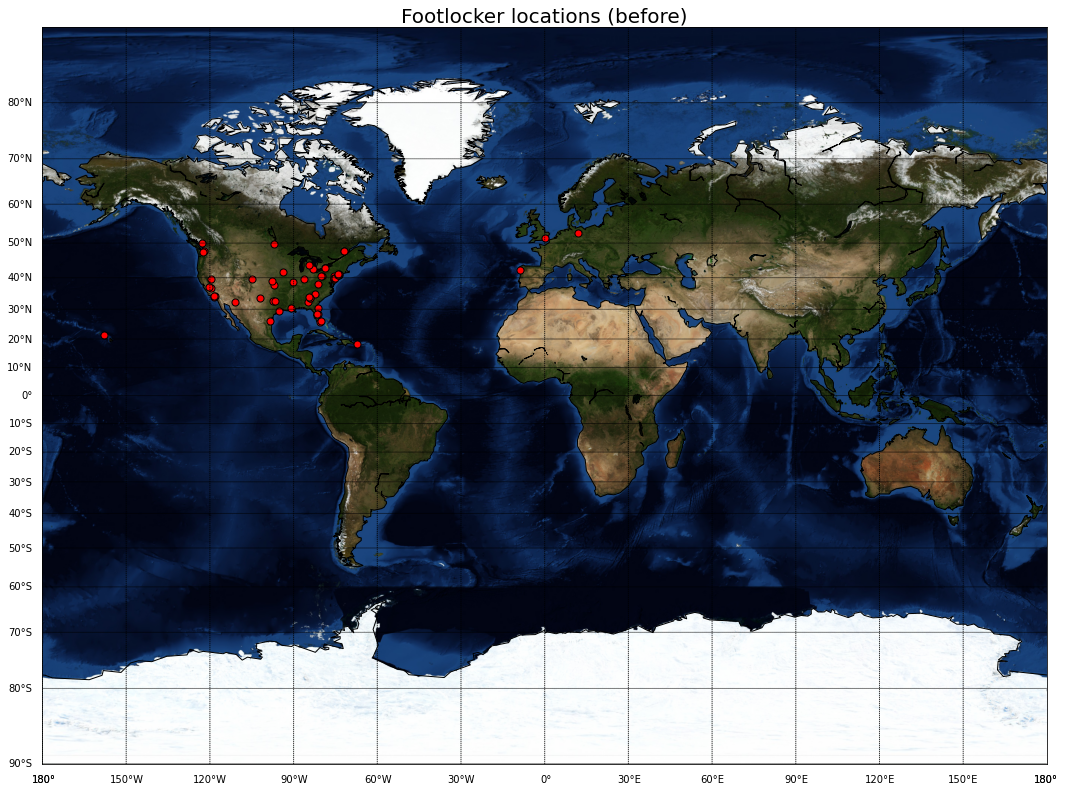

In [65]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure(figsize=(18,18))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           )

m.drawcoastlines()
m.bluemarble()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['latitudes'].tolist()
sites_lon_x = df['longitudes'].tolist()

colors = ['green', 'darkblue', 'yellow', 'red', 'blue', 'orange']

m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=50, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Footlocker locations (before)', fontsize=20)

plt.show()

In [47]:
df

,address_line_1,address_line_2,city,name,phone,state,url,zip_code,address,Updated_Date,coordinates,latitudes,longitudes
0,4500 N Oracle Road,Space 115,Tucson,Tucson Mall,(520) 888-0336,AZ,https://stores.ladyfootlocker.com/us/az/tucson...,85705,"4500 N Oracle Road, Space 115, Tucson, AZ, 85705",2021-02-28,"(North Oracle Road, Tucson, Pima County, Arizo...",32.286344,-110.978296
1,14200 E Alameda Ave,Space 2055,Aurora,Town Center At Aurora,(303) 363-8068,CO,https://stores.ladyfootlocker.com/us/co/aurora...,80012,"14200 E Alameda Ave, Space 2055, Aurora, CO, 8...",2021-02-28,"(East Alameda Avenue, Denver, Denver County, C...",39.711147,-104.986959
2,1450 Ala Moana Blvd,Space 1231,Honolulu,Ala Moana Center,(808) 942-1071,HI,https://stores.ladyfootlocker.com/us/hi/honolu...,96814,"1450 Ala Moana Blvd, Space 1231, Honolulu, HI,...",2021-02-28,"(Ala Moana Center, 1450, Ala Moana Boulevard, ...",21.291473,-157.843778
3,96 River Oaks Dr,NaN,Calumet City,River Oaks Center,(708) 868-6229,IL,https://stores.ladyfootlocker.com/us/il/calume...,60409,"96 River Oaks Dr, Calumet City, IL, 60409",2021-02-28,"(96, River Oaks Drive, Cass Brentwood Place, D...",41.572461,-93.665613
4,6401 Bluebonnet Blvd,Space 2114,Baton Rouge,Mall Of Louisiana,(225) 767-2198,LA,https://stores.ladyfootlocker.com/us/la/baton-...,70836,"6401 Bluebonnet Blvd, Space 2114, Baton Rouge,...",2021-02-28,"(Bluebonnet Boulevard, Baton Rouge, East Baton...",30.386458,-91.094169
5,250 Granite Street,Ste 2062,Braintree,South Shore Plaza,(781) 843-3258,MA,https://stores.ladyfootlocker.com/us/ma/braint...,2184,"250 Granite Street, Ste 2062, Braintree, MA, 0...",2021-02-28,"(Granite Street, Plumstead, Royal Borough of G...",51.485091,0.100915
6,18000 Vernier Rd,Ste 806,Harper Woods,Eastland Center,(313) 839-0440,MI,https://stores.ladyfootlocker.com/us/mi/harper...,48225,"18000 Vernier Rd, Ste 806, Harper Woods, MI, 4...",2021-02-28,"(Vernier Road, Eastpointe, Macomb County, Mich...",42.450150,-82.933630
7,2484 Saint Louis Galleria,NaN,St. Louis,Saint Louis Galleria,(314) 862-9323,MO,https://stores.ladyfootlocker.com/us/mo/st-lou...,63117,"2484 Saint Louis Galleria, St. Louis, MO, 63117",2021-02-28,"(Saint Louis Galleria, St Louis Galleria Stree...",38.635679,-90.348134
8,5385 Meadowood Mall,Space D128,Reno,Meadowood Mall,(775) 825-7901,NV,https://stores.ladyfootlocker.com/us/nv/reno/5...,89502,"5385 Meadowood Mall, Space D128, Reno, NV, 89502",2021-02-28,"(Meadowood Mall, Meadowood Mall Transit Access...",39.474276,-119.782179
9,4325 Glenwood Avenue,Ste 2074,Raleigh,Crabtree Valley Mall,(919) 786-9864,NC,https://stores.ladyfootlocker.com/us/nc/raleig...,27612,"4325 Glenwood Avenue, Ste 2074, Raleigh, NC, 2...",2021-02-28,"(Glenwood Avenue, Glenwood, Hazelwood, Pittsbu...",40.409430,-79.940189


#Inference
According to this output, the 19th and 58th locations are detected incorrectly and plotted to Germany and Spain using address_line_1. If we use the full address, we get NaN. Thus, I had hardcoded the values for the location string

In [77]:
location5 = nom.geocode("250 Granite Street", timeout=10000)
print(location5.latitude , location5.longitude)

location5 = nom.geocode("250 Granite Street, Ste 2062, Braintree",timeout=10000)
print(location5.latitude , location5.longitude)


51.485091 0.1009154
42.2189942 -71.02344998285133


In [79]:
#5th, 13th, 19th and 58th data entry  
location5 = nom.geocode("250 Granite Street, Ste 2062, Braintree",timeout=10000)
location19 = nom.geocode("Westfield San Francisco Centre, 865 Market Street",timeout=10000)
location58 = nom.geocode("Plaza Carolina",timeout=10000)
location13 = nom.geocode("Tysons Corner, Mclean",timeout=10000)

df.at[5,"latitudes"] = location5.latitude
df.at[5,"longitudes"] = location5.longitude

df.at[13,"latitudes"] = location13.latitude
df.at[13,"longitudes"] = location13.longitude

df.at[19,"latitudes"] = location19.latitude
df.at[19,"longitudes"] = location19.longitude

df.at[58,"latitudes"] = location58.latitude
df.at[58,"longitudes"] = location58.longitude

df.at[57,"state"] = "PR"
df.at[58,"state"] = "PR"




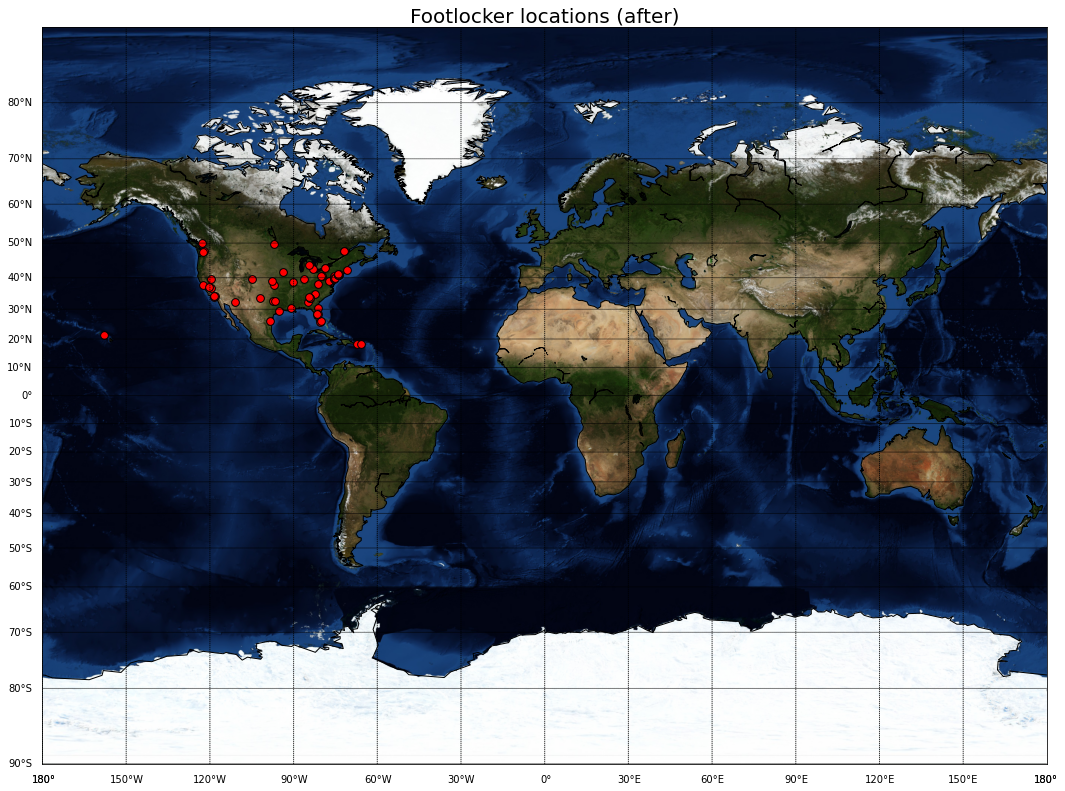

In [85]:
fig = plt.figure(figsize=(18,18))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           )

m.drawcoastlines()
m.bluemarble()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['latitudes'].tolist()
sites_lon_x = df['longitudes'].tolist()


m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=60, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Footlocker locations (after)', fontsize=20)

plt.show()

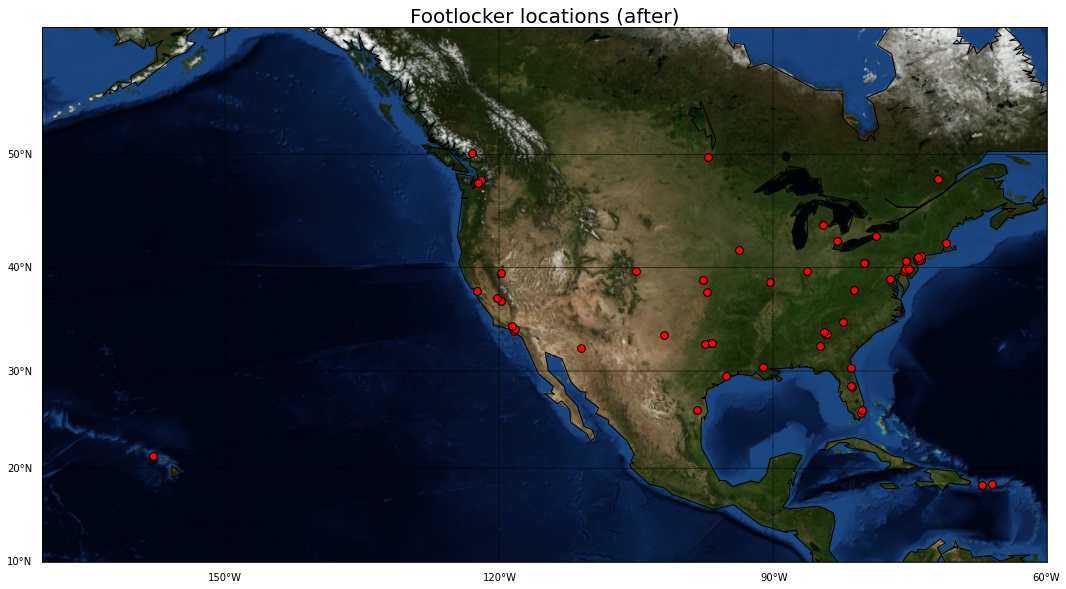

In [86]:
fig = plt.figure(figsize=(18,18))

m = Basemap(projection='mill',
           llcrnrlat = 10,
           urcrnrlat = 60,
           llcrnrlon = -170,
           urcrnrlon = -60,
           )

m.drawcoastlines()
m.bluemarble()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['latitudes'].tolist()
sites_lon_x = df['longitudes'].tolist()


m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=60, c='red', marker='o', alpha=1, edgecolor='k', linewidth=1, zorder=2)

plt.title('Footlocker locations (after)', fontsize=20)

plt.show()

The locations are revised and all locations are correctly plotted now

#Finding the states with maximum stores

In [ ]:
total = df['state'].value_counts()
states = df['state'].value_counts().index.tolist()

print(states)
print(total)

In [ ]:
import matplotlib.pyplot as plt

plt.barh(states[0:5],total[0:5])
plt.title('Top 5 states with maximum stores')
plt.ylabel('States')
plt.xlabel('Number of stores')
plt.show()

In [ ]:
#Prepared a list of abbreivations of all American states including Unincorporated organized territories

all_states = ["AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","GU","PR","VI"]

In [ ]:
#Removing common states from all states list
no_stores_states = list(set(states)^set(all_states))
len(no_stores_states)

In [ ]:
print("Total number of stores: ", len(df))

print("\nTop 5 store locations:")
for i in range(5):
  print(states[i] , ":" , total[i] , "stores")

print("\nThe stores are not available at the following states: ")
for i in no_stores_states:
  print(i, end=" ")

#Result

Total number of stores:  59

<b>Top 5 store locations:</b> <br>
TX : 9 stores <br>
CA : 8 stores <br>
NJ : 6 stores <br>
GA : 5 stores <br>
NY : 4 stores <br>

<b>The stores are not available at the following states:</b> 
VI NH AL RI IA CT MN NE NM WI AK UT VT KY GU IN ID SD ME OR AR WV ND MS MD TN MT WY 